## **Ex.1 - Loading the dataset**

In [39]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

Splitting the data into 70% training and 30% test subsets.

In [40]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     stratify=y,
                     random_state=0)

Standardizing the data.

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## **Ex.2 - Principal component analysis in scikit-learn**

### Part 1 - *Perform PCA and present the explained variance ratio* (check https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Perform the transformation on test data and plot the first two principal components.

Explained variance ratios: [0.36951469 0.18434927]


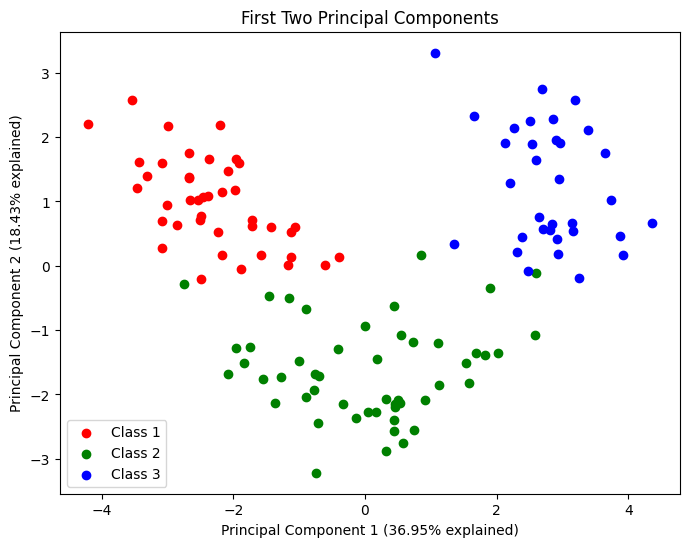

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fit PCA to the training data and transform the test data
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Present the explained variance ratio
print(f'Explained variance ratios: {pca.explained_variance_ratio_}')

# Create a scatter plot with different colors for the three classes
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']

for l, c, in zip(np.unique(y_train), colors):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=f'Class {l}')

plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% explained)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% explained)')
plt.title('First Two Principal Components')
plt.legend()
plt.show()


### Part 2 - *Training logistic regression classifier using the first 2 principal components*. Using a cross-validation procedure (check https://scikit-learn.org/stable/modules/cross_validation.html), select the best C parameter for the logistic regression with the first two principal components. Repeat the same procedure for the dataset with all the original features. Compare the results in terms of accuracy and confusion matrix. Present the conclusions.

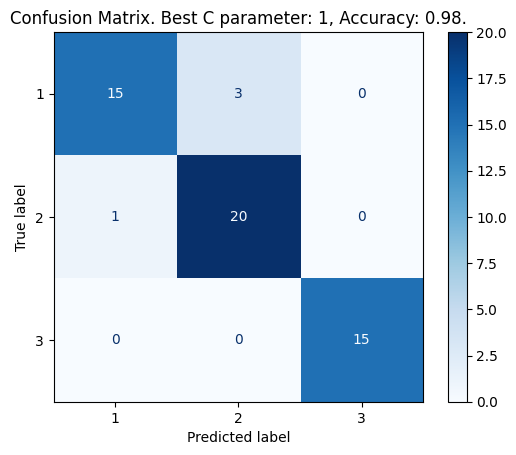

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

# Use cross-validation to select the best C parameter for logistic regression
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
best_accuracy_pca = 0
best_C_pca = 0

for C in c_values:
    lr_pca = LogisticRegression(C=C)
    scores = cross_val_score(lr_pca, X_train_pca, y_train, cv=5)
    accuracy = np.mean(scores)

    if accuracy > best_accuracy_pca:
        best_accuracy_pca = accuracy
        best_C_pca = C

# Train a logistic regression model with the best C parameter using the first two principal components
lr_pca = LogisticRegression(C=best_C_pca)
lr_pca.fit(X_train_pca, y_train)

# Create a ConfusionMatrixDisplay object and then plot it
ConfusionMatrixDisplay.from_estimator(lr_pca, X_test_pca, y_test, cmap='Blues')
plt.title(f'Confusion Matrix. Best C parameter: {best_C_pca}, Accuracy: {best_accuracy_pca:.2f}.')
plt.show()


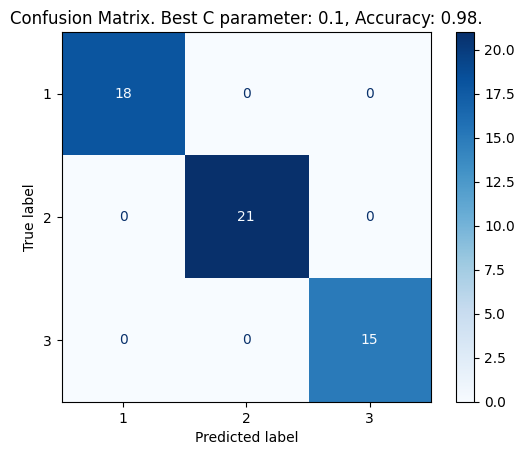

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

# Use cross-validation to select the best C parameter for logistic regression
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
best_accuracy_all = 0
best_C_all = 0

for C in c_values:
    lr_all = LogisticRegression(C=C)
    scores = cross_val_score(lr_all, X_train_std, y_train, cv=5)
    accuracy = np.mean(scores)

    if accuracy > best_accuracy_all:
        best_accuracy_all = accuracy
        best_C_all = C

# Train a logistic regression model with the best C parameter using the entire dataset
lr_all = LogisticRegression(C=best_C_all)
lr_all.fit(X_train_std, y_train)

# Plot the confusion matrix for the test data
ConfusionMatrixDisplay.from_estimator(lr_all, X_test_std, y_test, cmap='Blues')
plt.title(f'Confusion Matrix. Best C parameter: {best_C_all}, Accuracy: {best_accuracy_all:.2f}.')
plt.show()
